In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim import corpora, models
import re
import spacy
import textstat
from collections import Counter
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
top_n = 50
# Load stop words
stop_words = set(stopwords.words('english'))

# Read the Quran CSV file
quran_df = pd.read_csv('TheQuranDataset.csv')
quran_df.head()

# Read the Bible CSV file
bible_df = pd.read_csv('t_kjv.csv')
bible_df.head()

# Select the English translation column for Quran
quran_english_text = quran_df['ayah_en']


# Select the text column for Bible
bible_text = bible_df['t']


# print(quran_english_text)
# print(bible_text.head())
# print(quran_english_text.head())

In [3]:
df_bible = pd.DataFrame({'Bible': bible_text})
df_quran = pd.DataFrame({'Quran': quran_english_text})

# print (df_bible)

# TF-IDF Vectorizer for Bible
vectorizer_bible = TfidfVectorizer()
tfidf_matrix_bible = vectorizer_bible.fit_transform(df_bible['Bible'])

# Convert TF-IDF matrix to DataFrame
df_tfidf_bible = pd.DataFrame(tfidf_matrix_bible.toarray(), columns=vectorizer_bible.get_feature_names_out())

# # Display TF-IDF for Bible
# print("TF-IDF for Bible:")
# print(df_tfidf_bible)


In [4]:
# Get the sum of TF-IDF values for each word
word_tfidf_sum_bible = df_tfidf_bible.sum()

# Sort words based on their TF-IDF sum in descending order
sorted_words_bible = word_tfidf_sum_bible.sort_values(ascending=False)

# Display the top N words
# print(f"Top {top_n} words for Bible:")
# print(sorted_words_bible.head(top_n))

In [5]:
# TF-IDF Vectorizer for Bible
vectorizer_quran = TfidfVectorizer()
tfidf_matrix_quran = vectorizer_quran.fit_transform(df_quran['Quran'])

# Convert TF-IDF matrix to DataFrame
df_tfidf_quran = pd.DataFrame(tfidf_matrix_quran.toarray(), columns=vectorizer_quran.get_feature_names_out())

In [6]:
# Get the sum of TF-IDF values for each word
word_tfidf_sum_quran = df_tfidf_quran.sum()

# Sort words based on their TF-IDF sum in descending order
sorted_words_quran = word_tfidf_sum_quran.sort_values(ascending=False)

# Display the top N words
# print(f"Top {top_n} words for Quran:")
# print(sorted_words_quran.head(top_n))

In [7]:
# Define a function to preprocess text (including removing stopwords)
def preprocess_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    
    # Join the tokens back into a string
    return ' '.join(tokens)

In [8]:
df_bible_pre = pd.DataFrame({'Bible': bible_text})
df_quran_pre = pd.DataFrame({'Quran': quran_english_text})

# Preprocess text (remove stopwords)
df_bible_pre['Bible'] = df_bible_pre['Bible'].apply(preprocess_text)
df_quran_pre['Quran'] = df_quran_pre['Quran'].apply(preprocess_text)

In [9]:
# TF-IDF Vectorizer for Bible
vectorizer_bible_pre = TfidfVectorizer()
tfidf_matrix_bible_pre = vectorizer_bible_pre.fit_transform(df_bible_pre['Bible'])

# Convert TF-IDF matrix to DataFrame
df_tfidf_bible_pre = pd.DataFrame(tfidf_matrix_bible_pre.toarray(), columns=vectorizer_bible_pre.get_feature_names_out())

In [10]:
# Get the sum of TF-IDF values for each word
word_tfidf_sum_bible_pre = df_tfidf_bible_pre.sum()

# Sort words based on their TF-IDF sum in descending order
sorted_words_bible_pre = word_tfidf_sum_bible_pre.sort_values(ascending=False)

# Display the top N words
# print(f"Top {top_n} words for Bible:")
# print(sorted_words_bible_pre.head(top_n))

In [11]:
# TF-IDF Vectorizer for Quran
vectorizer_quran_pre = TfidfVectorizer()
tfidf_matrix_quran_pre = vectorizer_quran_pre.fit_transform(df_quran_pre['Quran'])

# Convert TF-IDF matrix to DataFrame
df_tfidf_quran_pre = pd.DataFrame(tfidf_matrix_quran_pre.toarray(), columns=vectorizer_quran_pre.get_feature_names_out())

In [12]:
# Get the sum of TF-IDF values for each word
word_tfidf_sum_quran_pre = df_tfidf_quran_pre.sum()

# Sort words based on their TF-IDF sum in descending order
sorted_words_quran_pre = word_tfidf_sum_quran_pre.sort_values(ascending=False)

# Display the top N words
# print(f"Top {top_n} words for Quran:")
# print(sorted_words_quran_pre.head(top_n))

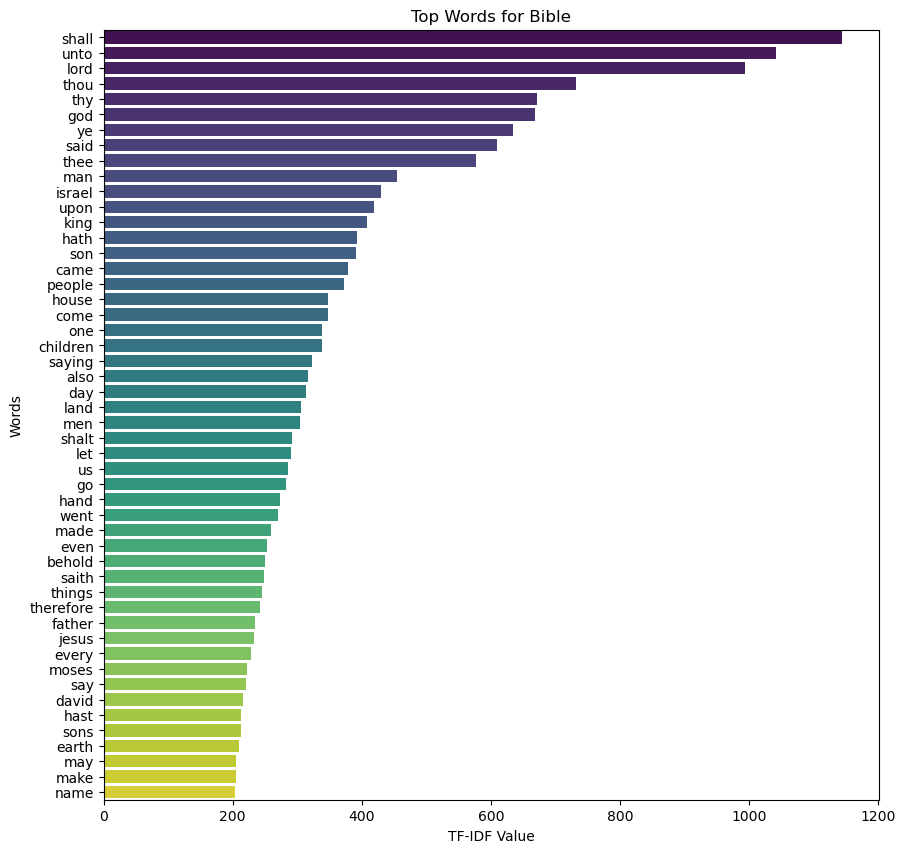

In [13]:
# Plot the top N words using Seaborn
plt.figure(figsize=(10, 10))
sns.barplot(x=sorted_words_bible_pre.head(top_n).values, y=sorted_words_bible_pre.head(top_n).index, palette='viridis')
plt.title('Top Words for Bible')
plt.xlabel('TF-IDF Value')
plt.ylabel('Words')
plt.show()

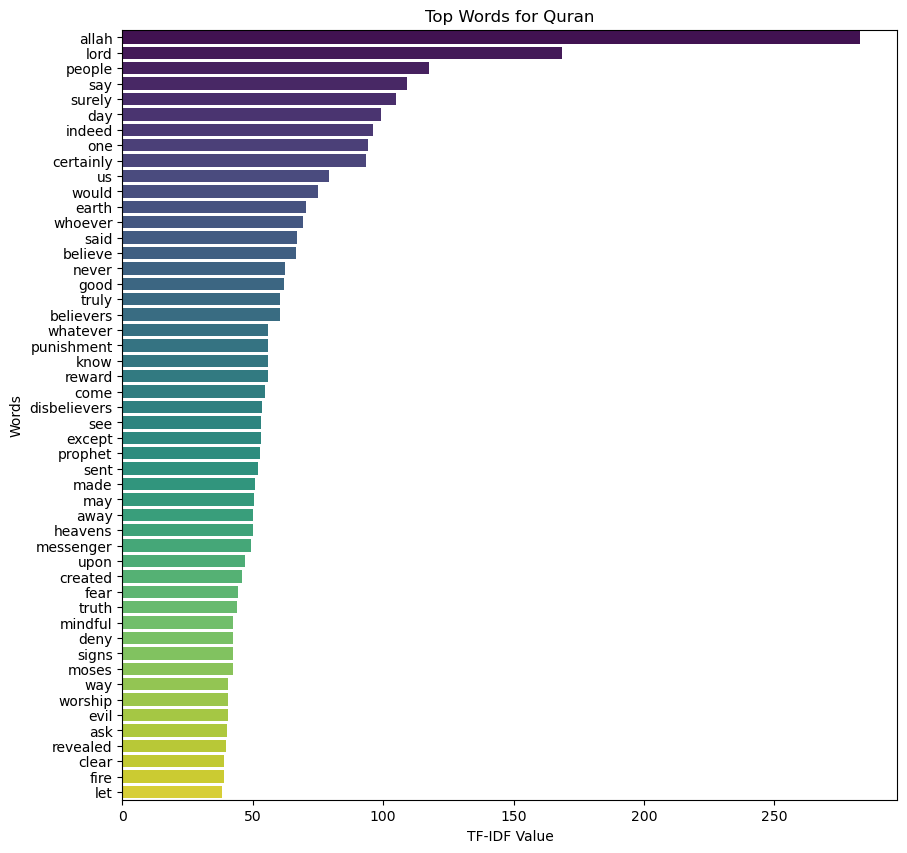

In [14]:
# Plot the top N words using Seaborn
plt.figure(figsize=(10, 10))
sns.barplot(x=sorted_words_quran_pre.head(top_n).values, y=sorted_words_quran_pre.head(top_n).index, palette='viridis')
plt.title('Top Words for Quran')
plt.xlabel('TF-IDF Value')
plt.ylabel('Words')
plt.show()

In [15]:
def custom_tokenizer(text):
    # Use regex to find words containing only letters and apostrophes
    words = re.findall(r'\b(?:[a-zA-Z\']+)\b', text)
    return words

In [16]:
# Tokenize sentences in Bible text
bible_sentences = nltk.sent_tokenize(' '.join(bible_text))
num_bible_sentences = len(bible_sentences)

# Tokenize sentences in Quran text
quran_sentences = nltk.sent_tokenize(' '.join(quran_english_text))
num_quran_sentences = len(quran_sentences)

print(f'Number of sentences in Bible: {num_bible_sentences}')
print(f'Number of sentences in Quran: {num_quran_sentences}')

Number of sentences in Bible: 29810
Number of sentences in Quran: 8873


In [17]:
# Tokenize words in Bible text
bible_words = nltk.word_tokenize(' '.join(bible_text))
bible_words = custom_tokenizer(' '.join(bible_text))
num_bible_words = len(bible_words)

# Tokenize words in Quran text
quran_words = nltk.word_tokenize(' '.join(quran_english_text))
quran_words = custom_tokenizer(' '.join(quran_english_text))
num_quran_words = len(quran_words)

print(f'Number of words in Bible: {num_bible_words}')
print(f'Number of words in Quran: {num_quran_words}')

Number of words in Bible: 789668
Number of words in Quran: 150788


In [18]:
# Count occurrences of the word "love" in the Bible
love_count_bible = sum(sentence.lower().count('love') for sentence in bible_text)

# Count occurrences of the word "love" in the Quran
love_count_quran = sum(sentence.lower().count('love') for sentence in quran_english_text)

print(f'Occurrences of "love" in the Bible: {love_count_bible}')
print(f'Occurrences of "love" in the Quran: {love_count_quran}')

Occurrences of "love" in the Bible: 645
Occurrences of "love" in the Quran: 43


In [19]:
# Find the largest and shortest sentences for Bible
df_bible['sentence_length'] = df_bible['Bible'].apply(lambda x: len(nltk.sent_tokenize(x)))
max_sentence_bible = df_bible.loc[df_bible['sentence_length'].idxmax(), 'Bible']
min_sentence_bible = df_bible.loc[df_bible['sentence_length'].idxmin(), 'Bible']

# Find the largest and shortest sentences for Quran
df_quran['sentence_length'] = df_quran['Quran'].apply(lambda x: len(nltk.sent_tokenize(x)))
max_sentence_quran = df_quran.loc[df_quran['sentence_length'].idxmax(), 'Quran']
min_sentence_quran = df_quran.loc[df_quran['sentence_length'].idxmin(), 'Quran']

print("Largest sentence in Bible:")
print(max_sentence_bible)
print("\nShortest sentence in Bible:")
print(min_sentence_bible)

print("\nLargest sentence in Quran:")
print(max_sentence_quran)
print("\nShortest sentence in Quran:")
print(min_sentence_quran)

Largest sentence in Bible:
Behold, here I am: witness against me before the LORD, and before his anointed: whose ox have I taken? or whose ass have I taken? or whom have I defrauded? whom have I oppressed? or of whose hand have I received any bribe to blind mine eyes therewith? and I will restore it you.

Shortest sentence in Bible:
In the beginning God created the heaven and the earth.

Largest sentence in Quran:
O believers! When you contract a loan for a fixed period of time, commit it to writing. Let the scribe maintain justice between the parties. The scribe should not refuse to write as Allah has taught them to write. They will write what the debtor dictates, bearing Allah in mind and not defrauding the debt. If the debtor is incompetent, weak, or unable to dictate, let their guardian dictate for them with justice. Call upon two of your men to witness. If two men cannot be found, then one man and two women of your choice will witness—so if one of the women forgets the other may r

In [20]:
# Function to find the longest word in a text
# def find_longest_word(text):
#     words = nltk.word_tokenize(text)
#     longest_word = max(words, key=len)
#     return longest_word

def find_longest_word(text):
    words = nltk.word_tokenize(text)
    valid_words = [word for word in words if '—' not in word and '-' not in word]  # Exclude words with a dash
    if valid_words:
        longest_word = max(valid_words, key=len)
        return longest_word
    return None

# Find the longest word for Bible
df_bible['longest_word'] = df_bible['Bible'].apply(find_longest_word)
longest_word_bible = df_bible.loc[df_bible['longest_word'].apply(len).idxmax(), 'longest_word']

# Find the longest word for Quran
df_quran['longest_word'] = df_quran['Quran'].apply(find_longest_word)
longest_word_quran = df_quran.loc[df_quran['longest_word'].apply(len).idxmax(), 'longest_word']

print("Longest word in Bible:")
print(longest_word_bible)

print("\nLongest word in Quran:")
print(longest_word_quran)

Longest word in Bible:
Mahershalalhashbaz

Longest word in Quran:
˹wholeheartedly˺


In [21]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment of a sentence
def get_sentiment(sentence):
    sentiment_scores = sia.polarity_scores(sentence)
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each sentence in Bible text
bible_sentiments = bible_text.apply(lambda x: get_sentiment(x))

# Apply sentiment analysis to each sentence in Quran text
quran_sentiments = quran_english_text.apply(lambda x: get_sentiment(x))

# Display the results
# print("Sentiments for Bible:")
# print(bible_sentiments.value_counts())

# print("\nSentiments for Quran:")
# print(quran_sentiments.value_counts())

In [22]:
# # Set the figure size
# plt.figure(figsize=(12, 6))

# # Create separate subplots for Bible and Quran sentiments
# plt.subplot(1, 2, 1)
# ax1 = sns.countplot(x=bible_sentiments, palette='viridis')
# ax1.set_title('Bible Sentiment Analysis')

# plt.subplot(1, 2, 2)
# ax2 = sns.countplot(x=quran_sentiments, palette='viridis')
# ax2.set_title('Quran Sentiment Analysis')

# # Adjust layout
# plt.tight_layout()

# # Display the plots
# plt.show()

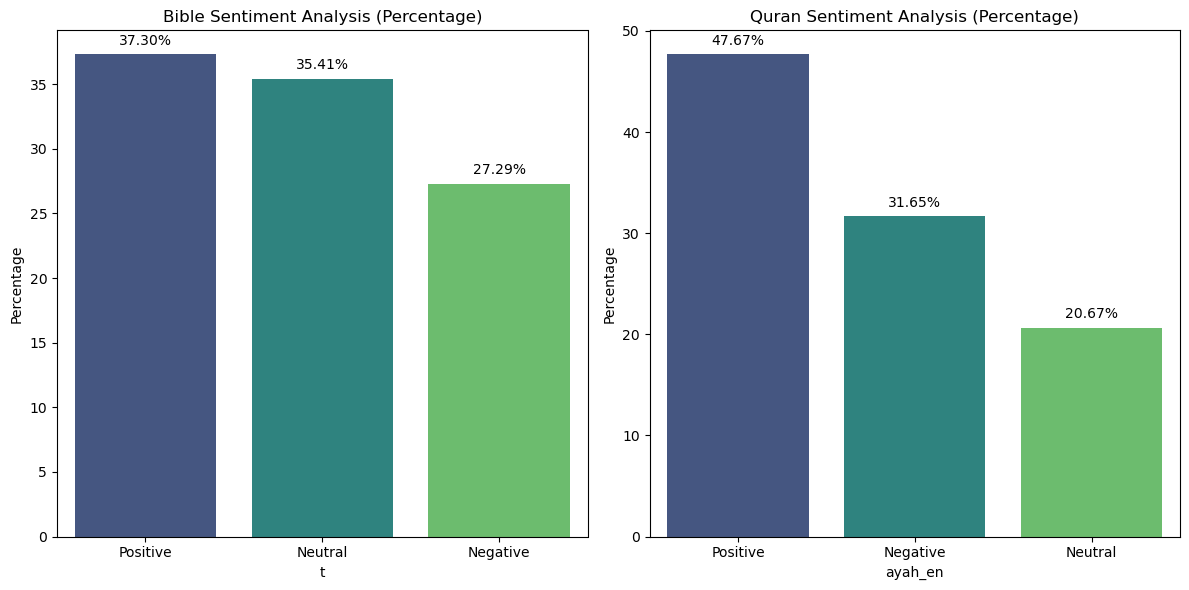

In [23]:
# Calculate percentages for Bible sentiments
bible_sentiment_percentages = (bible_sentiments.value_counts() / len(bible_sentiments)) * 100

# Calculate percentages for Quran sentiments
quran_sentiment_percentages = (quran_sentiments.value_counts() / len(quran_sentiments)) * 100

# Set the figure size
plt.figure(figsize=(12, 6))

# Create separate subplots for Bible and Quran sentiments
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=bible_sentiment_percentages.index, y=bible_sentiment_percentages, palette='viridis')
ax1.set_title('Bible Sentiment Analysis (Percentage)')
ax1.set_ylabel('Percentage')

# Display percentages on the bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=quran_sentiment_percentages.index, y=quran_sentiment_percentages, palette='viridis')
ax2.set_title('Quran Sentiment Analysis (Percentage)')
ax2.set_ylabel('Percentage')

# Display percentages on the bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

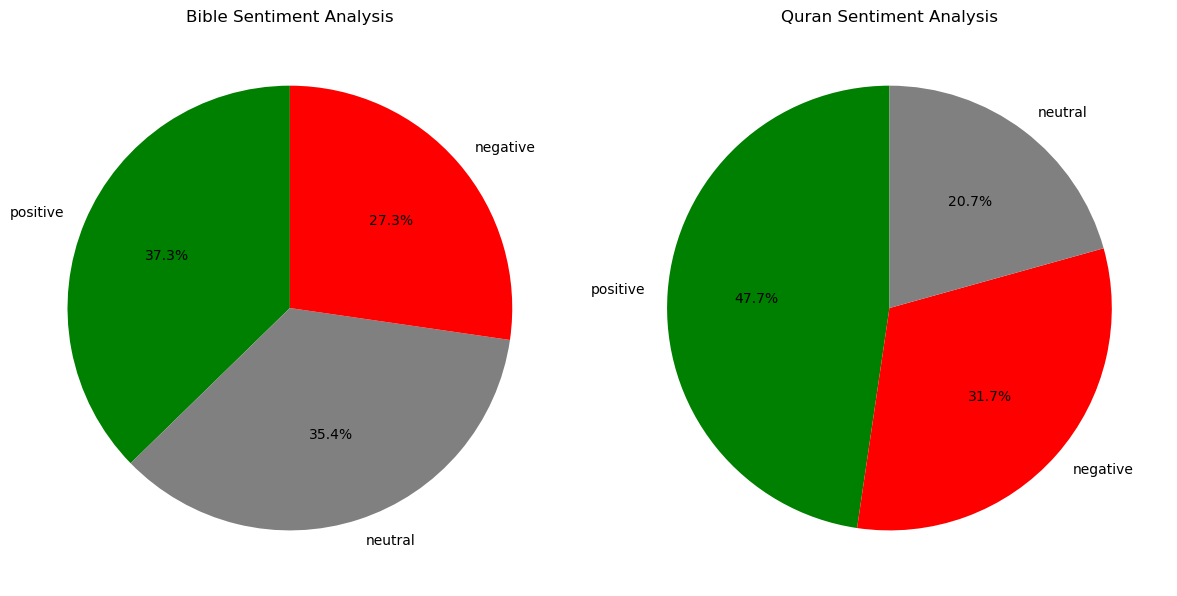

In [24]:
# Set custom colors for sentiments
colors = {'positive': 'green', 'neutral': 'gray', 'negative': 'red'}

# Convert sentiment labels to lowercase
bible_sentiments_lower = bible_sentiments.str.lower()
quran_sentiments_lower = quran_sentiments.str.lower()

# Calculate percentages for Bible sentiments
bible_sentiment_percentages = (bible_sentiments_lower.value_counts() / len(bible_sentiments_lower)) * 100

# Calculate percentages for Quran sentiments
quran_sentiment_percentages = (quran_sentiments_lower.value_counts() / len(quran_sentiments_lower)) * 100

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a subplot for Bible sentiment pie chart
plt.subplot(1, 2, 1)
plt.pie(bible_sentiment_percentages, labels=bible_sentiment_percentages.index, autopct='%1.1f%%', startangle=90, colors=[colors[sentiment] for sentiment in bible_sentiment_percentages.index])
plt.title('Bible Sentiment Analysis')

# Create a subplot for Quran sentiment pie chart
plt.subplot(1, 2, 2)
plt.pie(quran_sentiment_percentages, labels=quran_sentiment_percentages.index, autopct='%1.1f%%', startangle=90, colors=[colors[sentiment] for sentiment in quran_sentiment_percentages.index])
plt.title('Quran Sentiment Analysis')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [25]:
def preprocess_lda(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [26]:
# Preprocess Bible and Quran texts for LDA
bible_lda_texts = [preprocess_lda(sentence) for sentence in bible_text]
quran_lda_texts = [preprocess_lda(sentence) for sentence in quran_english_text]

# Create a dictionary representation of the Bible and Quran texts
bible_dictionary = corpora.Dictionary(bible_lda_texts)
quran_dictionary = corpora.Dictionary(quran_lda_texts)

# Convert the dictionary to a bag-of-words representation
bible_corpus = [bible_dictionary.doc2bow(text) for text in bible_lda_texts]
quran_corpus = [quran_dictionary.doc2bow(text) for text in quran_lda_texts]

# Train the LDA models
bible_lda_model = models.LdaModel(bible_corpus, num_topics=5, id2word=bible_dictionary, passes=15)
quran_lda_model = models.LdaModel(quran_corpus, num_topics=5, id2word=quran_dictionary, passes=15)

# Print the topics for Bible
print("Topics for Bible:")
print(bible_lda_model.print_topics())

# Print the topics for Quran
print("\nTopics for Quran:")
print(quran_lda_model.print_topics())

Topics for Bible:
[(0, '0.018*"came" + 0.016*"went" + 0.013*"unto" + 0.012*"upon" + 0.012*"king" + 0.012*"great" + 0.010*"world" + 0.010*"saw" + 0.010*"spirit" + 0.008*"city"'), (1, '0.032*"son" + 0.014*"seven" + 0.014*"sons" + 0.013*"two" + 0.013*"one" + 0.012*"thousand" + 0.011*"children" + 0.011*"three" + 0.011*"priest" + 0.009*"years"'), (2, '0.060*"thou" + 0.045*"thy" + 0.041*"thee" + 0.015*"god" + 0.013*"hast" + 0.012*"unto" + 0.012*"shalt" + 0.012*"shall" + 0.012*"lord" + 0.009*"love"'), (3, '0.051*"unto" + 0.036*"ye" + 0.036*"lord" + 0.036*"god" + 0.021*"said" + 0.017*"shall" + 0.015*"jesus" + 0.014*"us" + 0.013*"saith" + 0.013*"hath"'), (4, '0.081*"shall" + 0.016*"man" + 0.015*"upon" + 0.013*"every" + 0.012*"one" + 0.009*"thereof" + 0.008*"flesh" + 0.008*"earth" + 0.008*"blood" + 0.007*"eat"')]

Topics for Quran:
[(0, '0.017*"one" + 0.014*"lord" + 0.013*"wealth" + 0.010*"prophet" + 0.010*"day" + 0.008*"certainly" + 0.008*"well" + 0.007*"urge" + 0.007*"benefit" + 0.007*"prayer"

In [27]:
# Visualization for Bible
bible_lda_vis_data = gensimvis.prepare(bible_lda_model, bible_corpus, bible_dictionary)
pyLDAvis.display(bible_lda_vis_data)



In [28]:
# Visualization for Quran
quran_lda_vis_data = gensimvis.prepare(quran_lda_model, quran_corpus, quran_dictionary)
pyLDAvis.display(quran_lda_vis_data)

In [37]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 4237450 

# Process Bible text
bible_doc = nlp(' '.join(bible_text))

# Process Quran text
quran_doc = nlp(' '.join(quran_english_text))

# Function to process text and extract named entities
def extract_entities(text):
    # Convert text to string
    text_str = str(text)

    # Split the text into chunks of a certain size (e.g., 500,000 characters)
    chunk_size = 500000
    chunks = [text_str[i:i+chunk_size] for i in range(0, len(text_str), chunk_size)]

    # Process each chunk and extract named entities
    entities = []
    for chunk in chunks:
        doc = nlp(chunk)
        entities.extend([(ent.text, ent.label_) for ent in doc.ents])

    return entities

# Extract named entities for Bible and Quran
bible_entities = extract_entities(bible_doc)
quran_entities = extract_entities(quran_doc)

# Count the occurrences of each named entity label
bible_entity_labels = [label for _, label in bible_entities]
quran_entity_labels = [label for _, label in quran_entities]

# Create Counters for each text
bible_entity_counter = Counter(bible_entity_labels)
quran_entity_counter = Counter(quran_entity_labels)


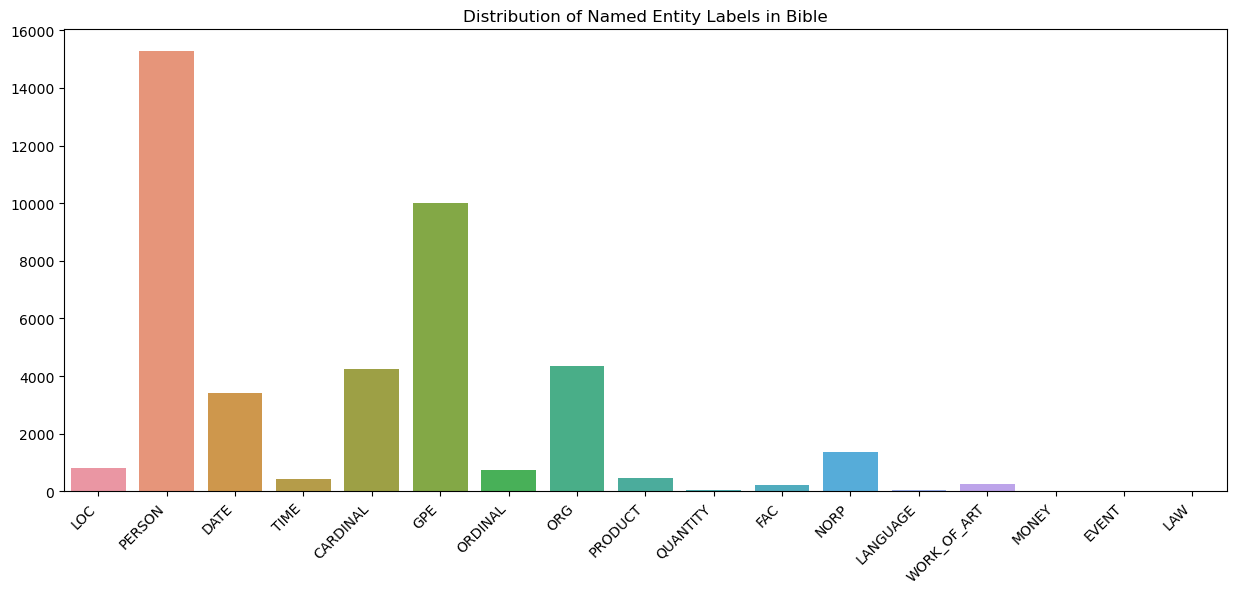

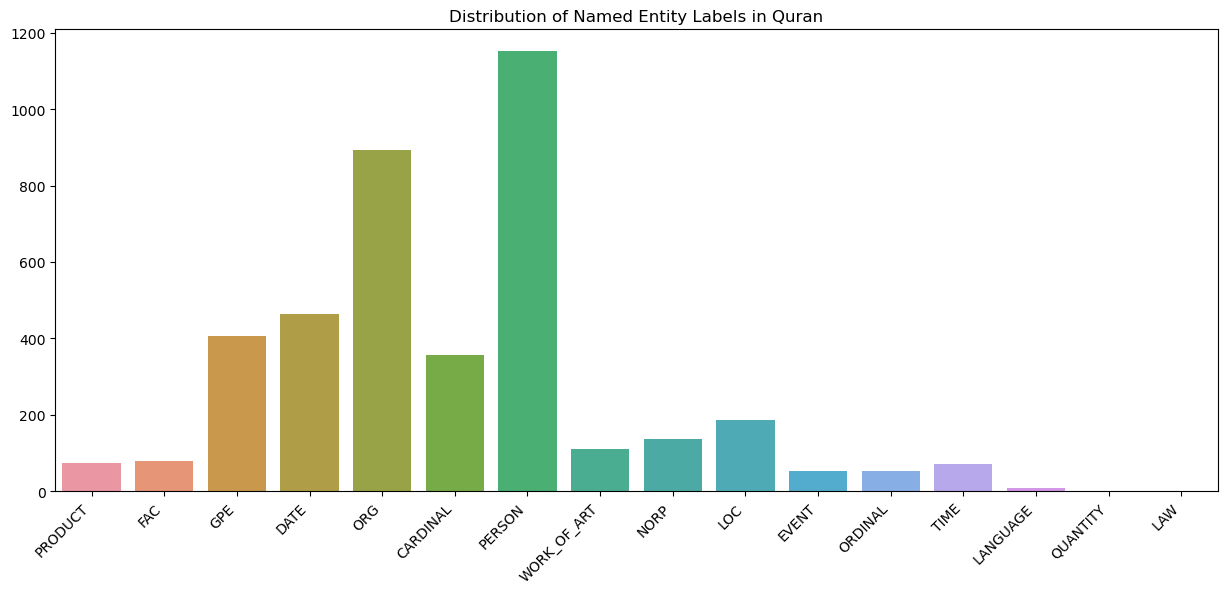

In [38]:
# Plot the distribution of named entity labels for Bible
plt.figure(figsize=(15, 6))  # Increase the width of the figure
sns.barplot(x=list(bible_entity_counter.keys()), y=list(bible_entity_counter.values()))
plt.title('Distribution of Named Entity Labels in Bible')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Plot the distribution of named entity labels for Quran
plt.figure(figsize=(15, 6))  # Increase the width of the figure
sns.barplot(x=list(quran_entity_counter.keys()), y=list(quran_entity_counter.values()))
plt.title('Distribution of Named Entity Labels in Quran')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [39]:
# Function to compute readability scores for a given text
def compute_readability(text):
    scores = {
        "flesch_reading_ease": textstat.flesch_reading_ease(text),
        "smog_index": textstat.smog_index(text),
        "flesch_kincaid_grade": textstat.flesch_kincaid_grade(text),
        "coleman_liau_index": textstat.coleman_liau_index(text),
        "automated_readability_index": textstat.automated_readability_index(text),
        "dale_chall_readability_score": textstat.dale_chall_readability_score(text),
    }
    return scores

# Compute readability scores for Bible text
bible_readability_scores = compute_readability(' '.join(bible_text))

# Compute readability scores for Quran text
quran_readability_scores = compute_readability(' '.join(quran_english_text))

# Print the readability scores
print("Readability Scores for Bible:")
print(bible_readability_scores)

print("\nReadability Scores for Quran:")
print(quran_readability_scores)

Readability Scores for Bible:
{'flesch_reading_ease': 78.32, 'smog_index': 8.5, 'flesch_kincaid_grade': 8.9, 'coleman_liau_index': 6.68, 'automated_readability_index': 11.9, 'dale_chall_readability_score': 1.54}

Readability Scores for Quran:
{'flesch_reading_ease': 82.14, 'smog_index': 9.1, 'flesch_kincaid_grade': 5.4, 'coleman_liau_index': 7.18, 'automated_readability_index': 7.3, 'dale_chall_readability_score': 1.18}


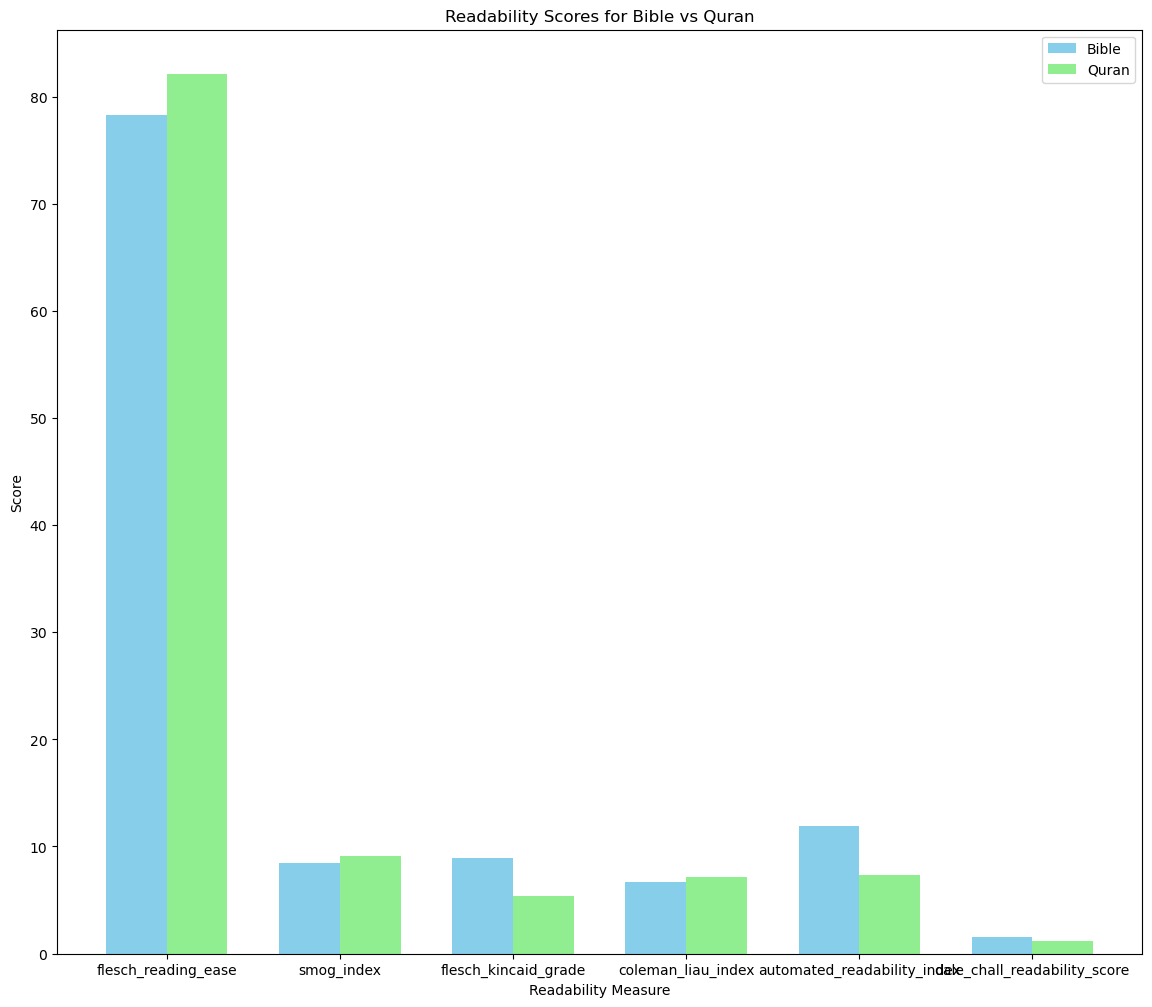

In [49]:
# Function to plot readability scores as a bar chart
def plot_readability_scores(bible_scores, quran_scores, title):
    measures = list(bible_scores.keys())
    values_bible = list(bible_scores.values())
    values_quran = list(quran_scores.values())

    x = np.arange(len(measures))
    width = 0.35

    fig, ax = plt.subplots(figsize=(14, 12))
    rects1 = ax.bar(x - width/2, values_bible, width, label='Bible', color='skyblue')
    rects2 = ax.bar(x + width/2, values_quran, width, label='Quran', color='lightgreen')

    ax.set_title(f'Readability Scores for {title}')
    ax.set_xlabel('Readability Measure')
    ax.set_ylabel('Score')
    ax.set_xticks(x)
    ax.set_xticklabels(measures)
    ax.legend()

    plt.show()

    
# Plot readability scores as bar charts
plot_readability_scores(bible_readability_scores, quran_readability_scores, "Bible vs Quran")